# Airline Satisfaction Project

###  june 2024

In [1]:
# Import neccessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=12)
from sklearn import preprocessing
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# EDA / Preprocessing

In [2]:
data = pd.read_csv("D:\DATA Science Institute_Semos\DP100_Project\Airlines Customer satistaction\Airlines Customer satistaction\Airline_data.csv")
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
data.tail()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
data.describe(include='object')

,satisfaction,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [6]:
data.iloc[:, 0:14].describe(include='number')

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
data.iloc[:, 14:23].describe(include='number')

,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<Axes: ylabel='count'>

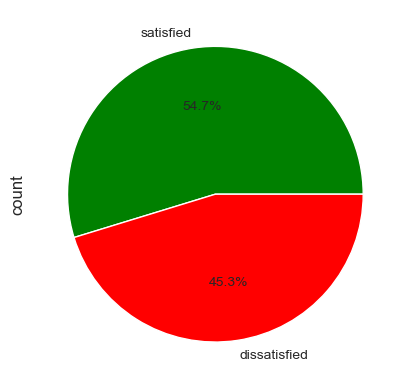

In [8]:
data['satisfaction'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red'], textprops={'fontsize':10})


In [9]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [10]:
num_cols=[i for i in data.columns if data[i].dtypes !='object']
num_cols

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [11]:
discrete_num_cols = ['Seat comfort','Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                     'Inflight wifi service', 'Inflight entertainment', 'Online support','Ease of Online booking', 
                     'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 
                     'Cleanliness', 'Online boarding']
contin_num_cols = [i for i in num_cols if i not in discrete_num_cols]
contin_num_cols


['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

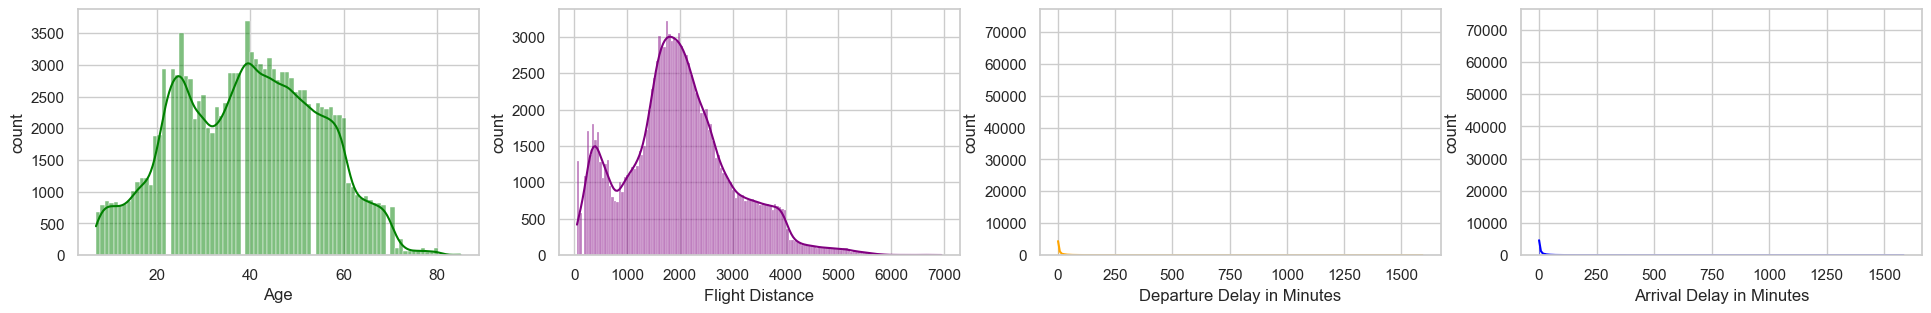

In [12]:
plt.figure(figsize=(30, 30))

colors = ['blue', 'green', 'purple', 'orange']

for i, col in enumerate(contin_num_cols, 1):
    plt.subplot(8,5,i)
    sns.histplot(data=data,kde=True,x=col,color=colors[i % len(colors)])
    plt.xlabel(col)
    plt.ylabel('count')

In [13]:
print(f'Number of columns with coniniuous values: {len(contin_num_cols)}')
print(f'Number of columns with discrete values: {len(discrete_num_cols)}')

Number of columns with coniniuous values: 4
Number of columns with discrete values: 14


In [14]:
cat_cols=[i for i in data.columns if data[i].dtypes =='object']
print(f'Number of columns with categorical values: {len(cat_cols)}')

Number of columns with categorical values: 5


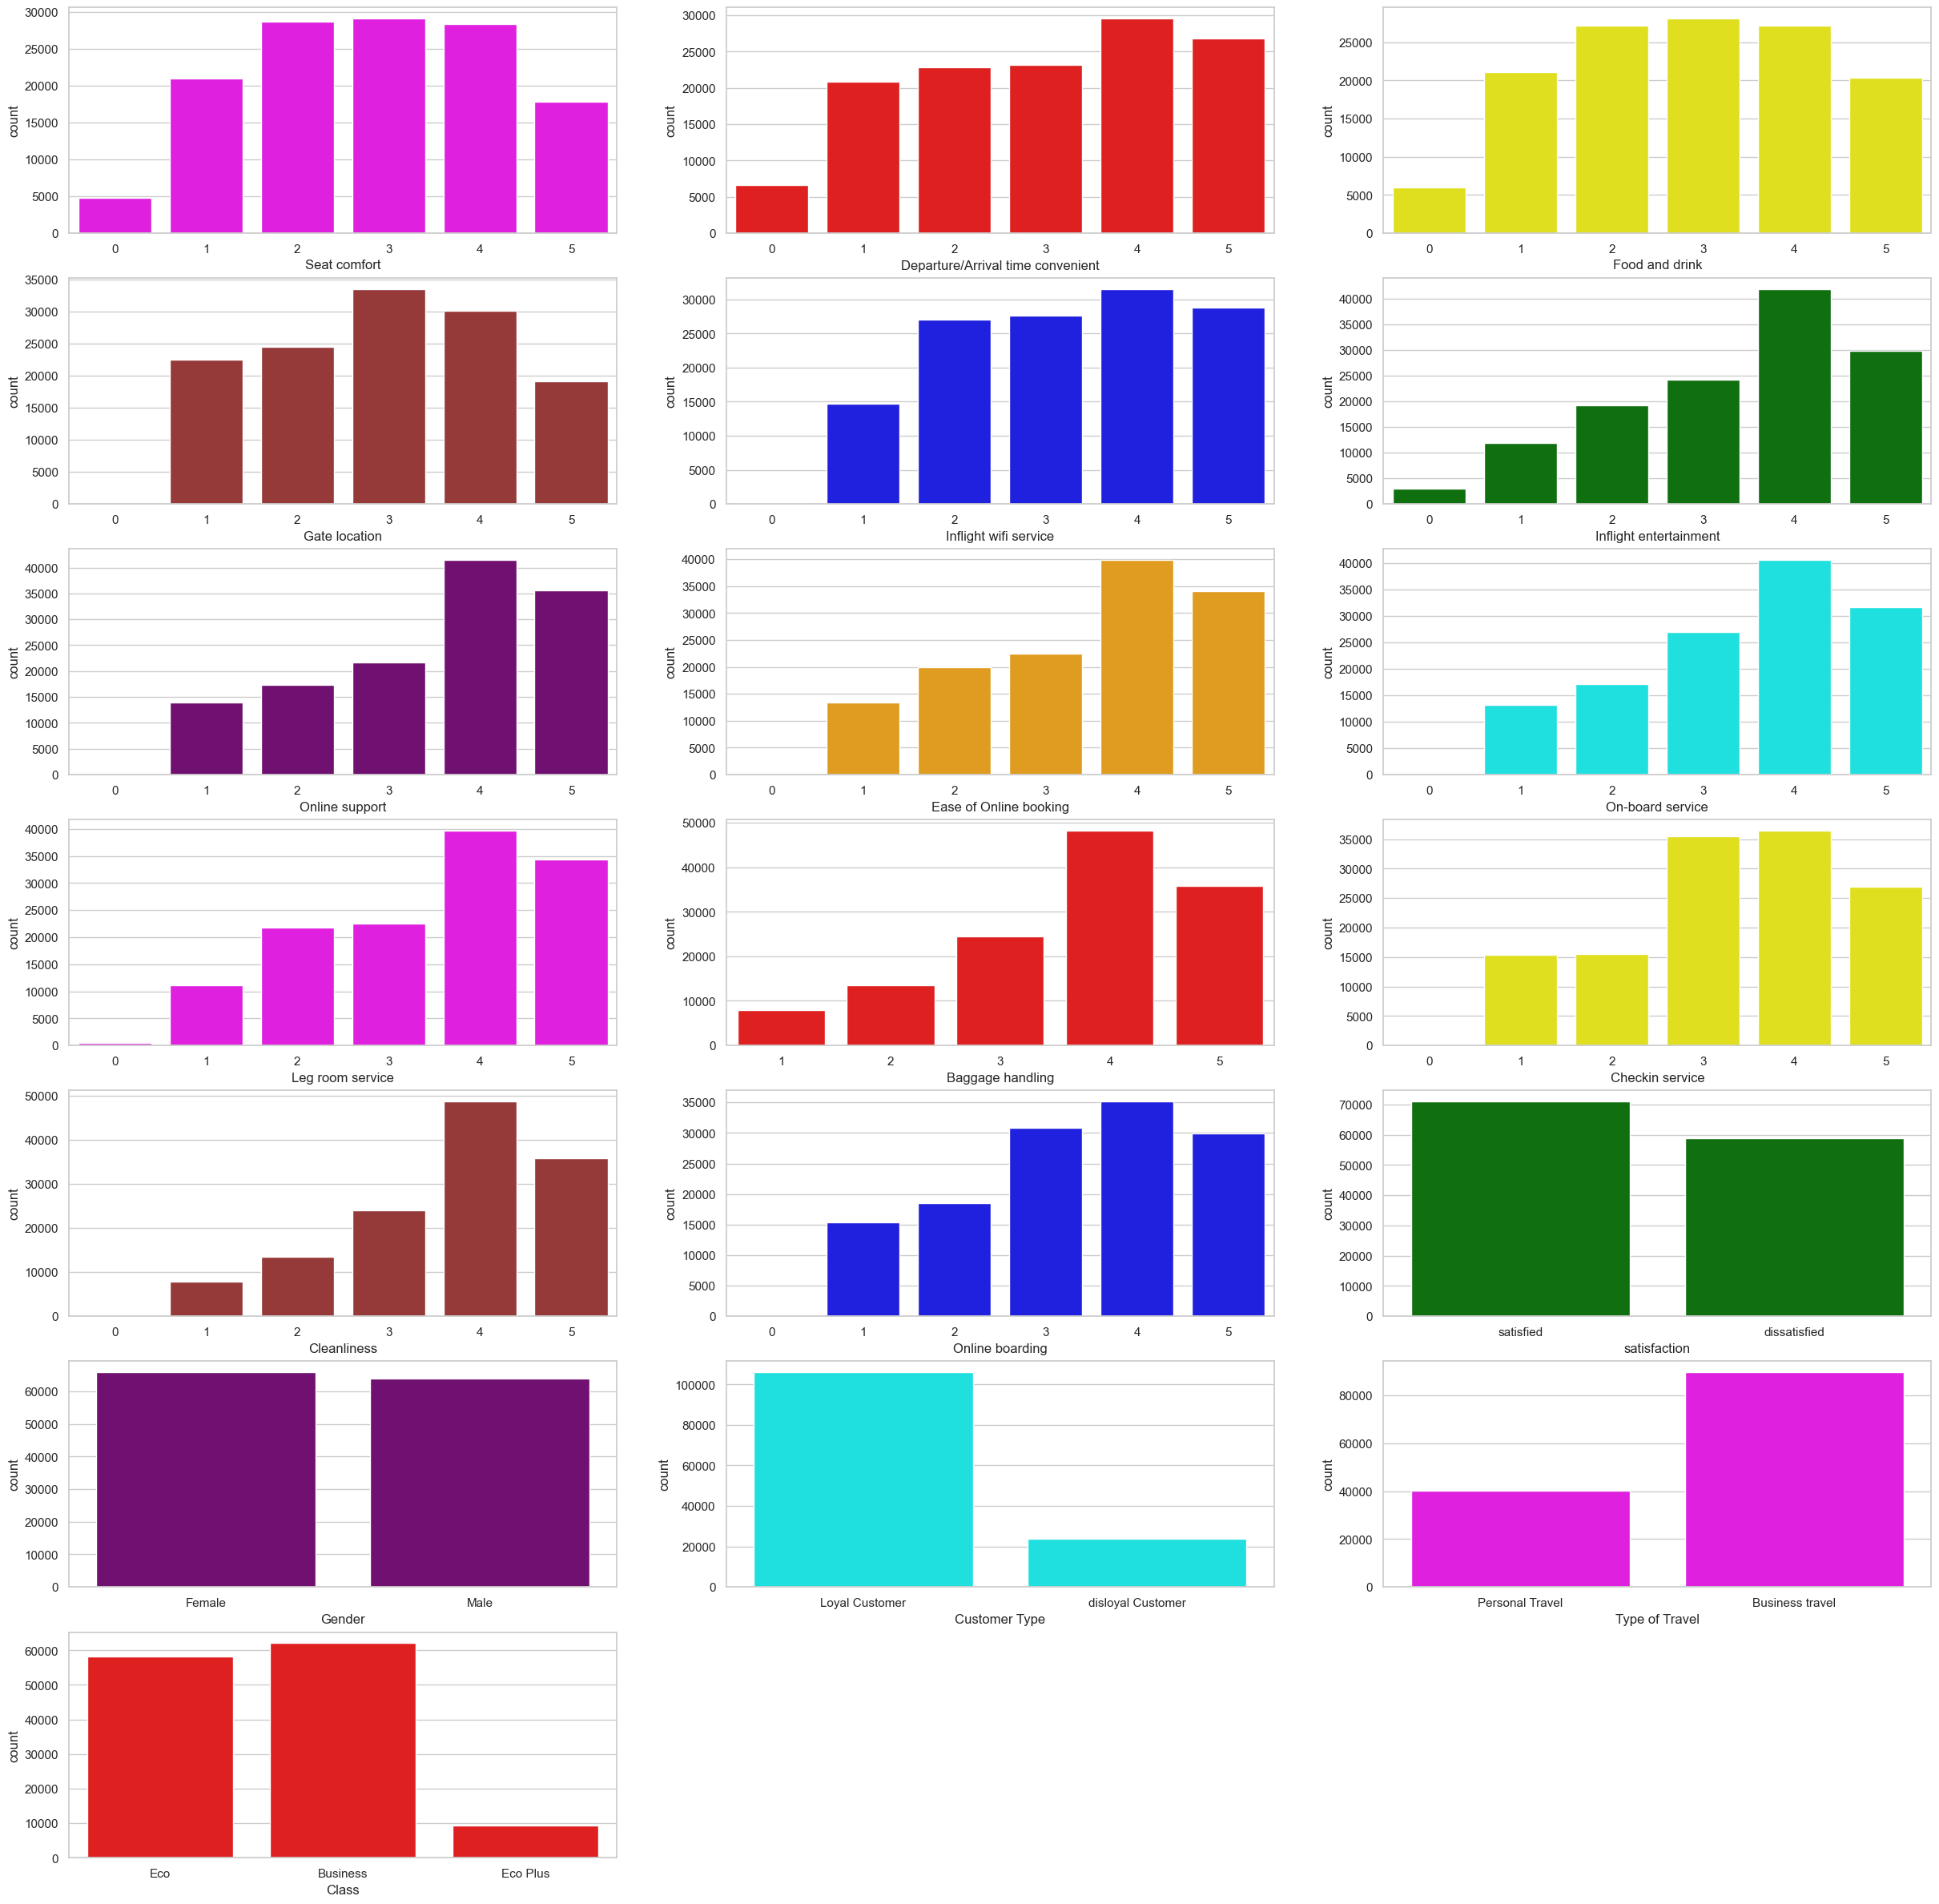

In [15]:
plt.figure(figsize=(30, 30))

colors = ['cyan', 'magenta', 'red', 'yellow', "brown", 'blue', 'green', 'purple', 'orange', 
          'cyan', 'magenta', 'red', 'yellow', "brown", 'blue', 'green', 'purple']
cols = discrete_num_cols + cat_cols

for i, col in enumerate(cols, 1):
    plt.subplot(7,3,i)
    sns.countplot(data=data,x=col,color=colors[i % len(colors)])
    plt.xlabel(col)
    plt.ylabel('count')

<Axes: >

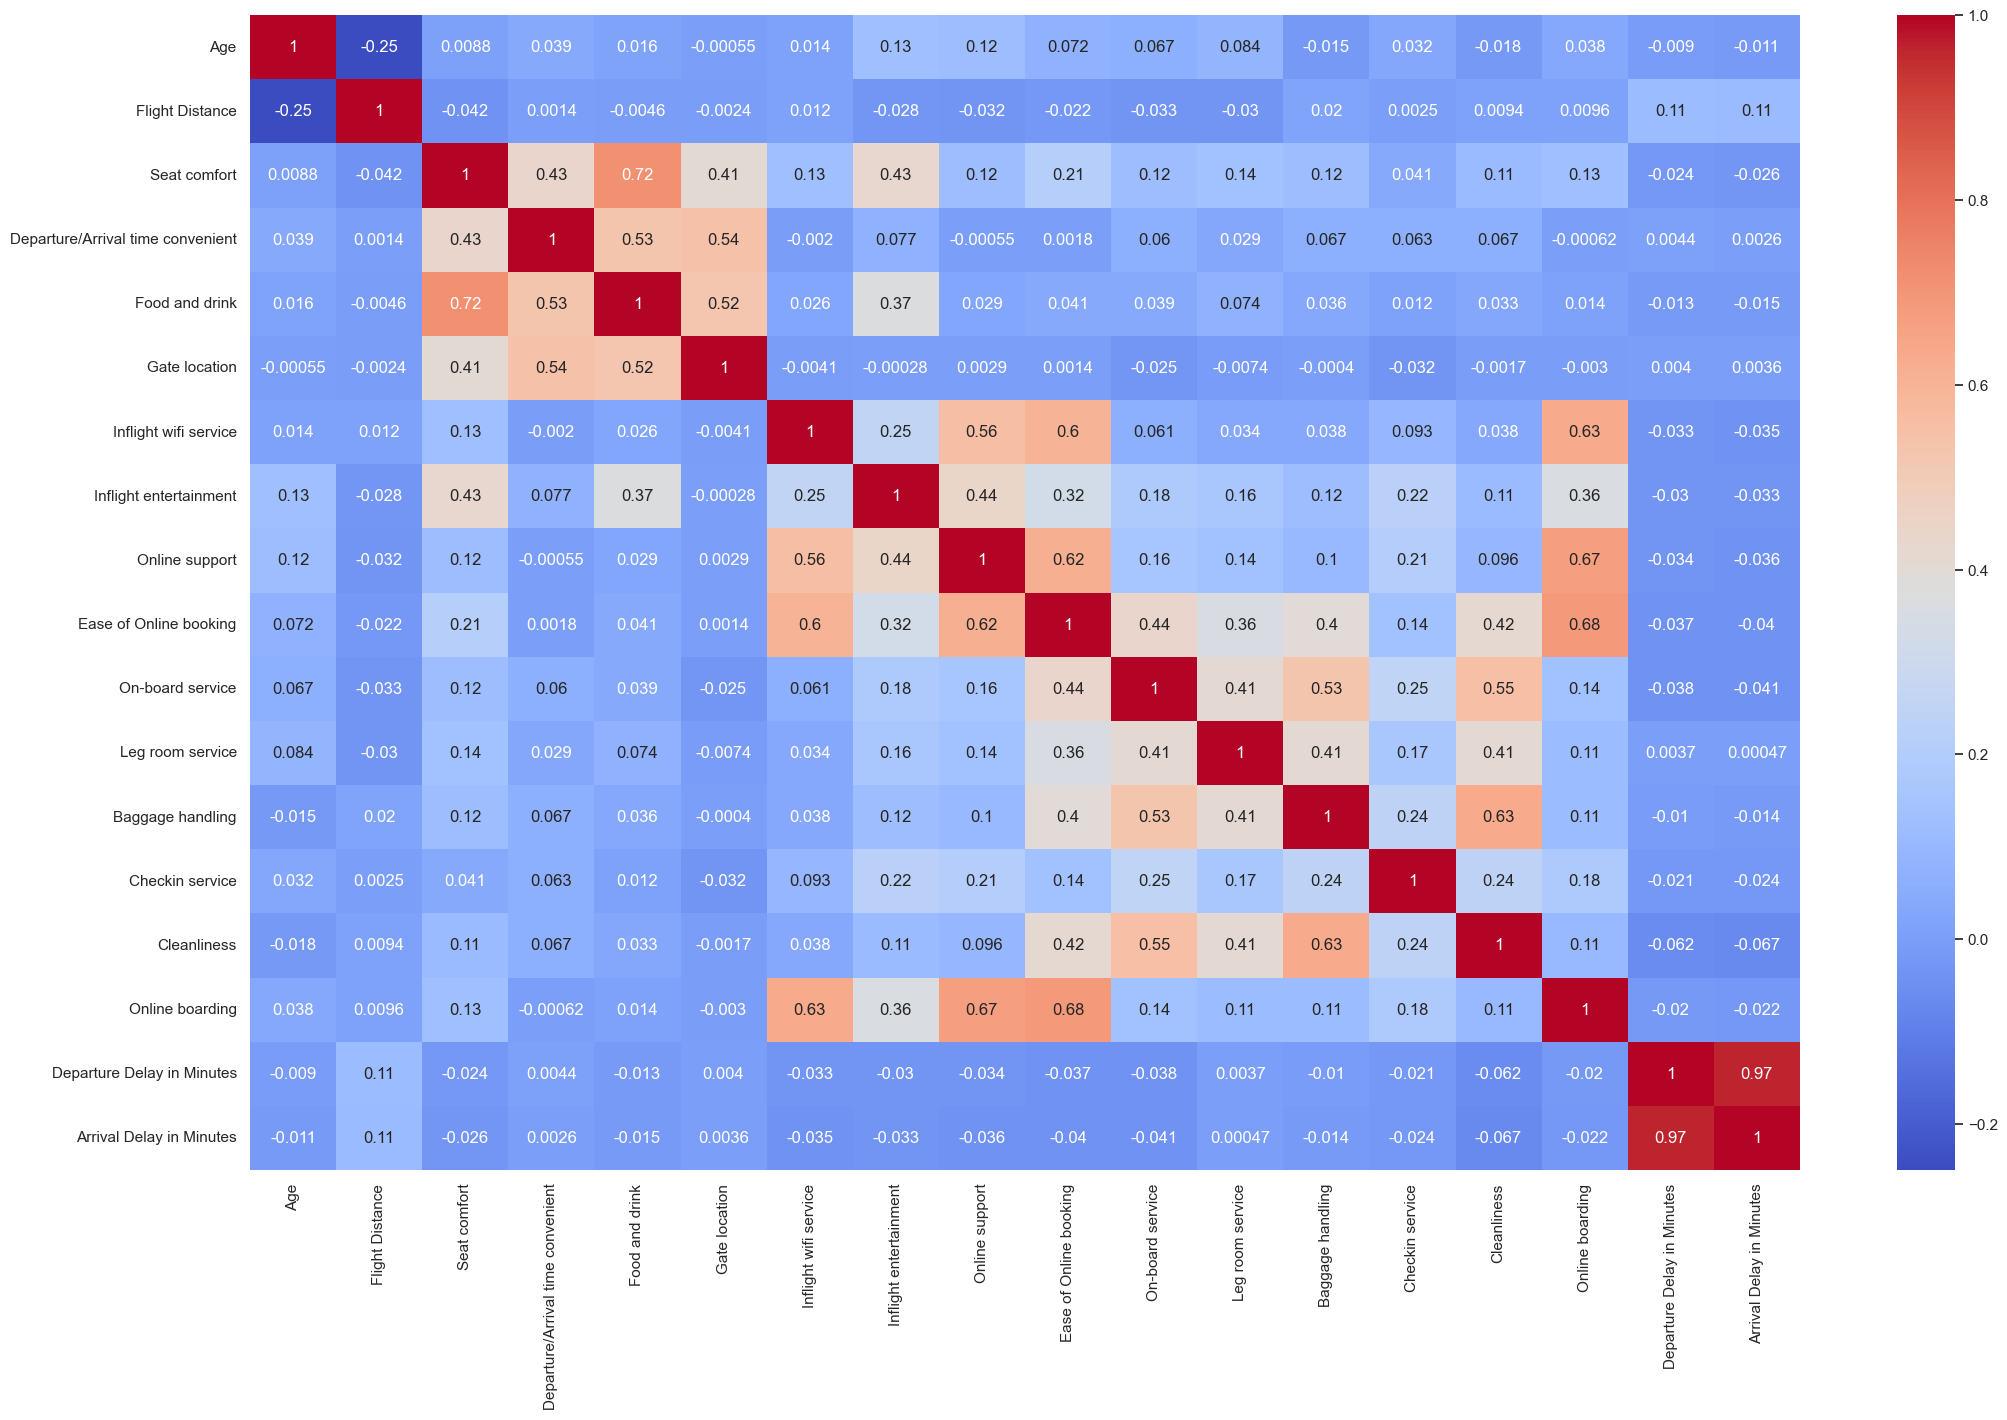

In [16]:
# Correlation between numerical features
corr_matrix = data[num_cols].corr()
plt.figure(figsize = (25,15))
sns.heatmap(corr_matrix,annot = True, cmap = 'coolwarm')

As expected, Departure Delay in Minutes and Arrival Delay in Minutes are highly correlated.

In [17]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [18]:
cleaned_data = data.copy()
def impute_missing_data(data):
    data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(), inplace = True)
    cleaned_data['Arrival Delay in Minutes'] = cleaned_data['Arrival Delay in Minutes'].astype('int64')
    return data

impute_missing_data(cleaned_data)
cleaned_data.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [19]:
cleaned_data.dtypes


satisfaction                         object
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Seat comfort                          int64
Departure/Arrival time convenient     int64
Food and drink                        int64
Gate location                         int64
Inflight wifi service                 int64
Inflight entertainment                int64
Online support                        int64
Ease of Online booking                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Cleanliness                           int64
Online boarding                       int64
Departure Delay in Minutes            int64
Arrival Delay in Minutes        

## Label categorical features

In [20]:
# LabelEncoder is used for labeling the two classes of the target feature

from sklearn.preprocessing import LabelEncoder
labeled_data = cleaned_data.copy()
def label_data(data):
    le = LabelEncoder()
    data['satisfaction'] = le.fit_transform(data['satisfaction'])
    return data
label_data(labeled_data)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0
129876,0,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172
129877,0,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163
129878,0,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205


In [21]:
labeled_data['satisfaction'].dtypes

dtype('int32')

In [22]:
# Get_dummies is used for labeling categorical features - dumy variables are created

def dummy_data(data):
    cat_cols = data.select_dtypes(include='object').columns
    print(cat_cols)
    data_with_dummies = pd.get_dummies(data, columns = cat_cols, prefix = 'var')
    return data_with_dummies

data_encoded = dummy_data(labeled_data)
data_encoded

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')


,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,var_Female,var_Male,var_Loyal Customer,var_disloyal Customer,var_Business travel,var_Personal Travel,var_Business,var_Eco,var_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,...,0,True,False,True,False,False,True,False,True,False
1,1,47,2464,0,0,0,3,0,2,2,...,305,False,True,True,False,False,True,True,False,False
2,1,15,2138,0,0,0,3,2,0,2,...,0,True,False,True,False,False,True,False,True,False
3,1,60,623,0,0,0,3,3,4,3,...,0,True,False,True,False,False,True,False,True,False
4,1,70,354,0,0,0,3,4,3,4,...,0,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,1731,5,5,5,3,2,5,2,...,0,True,False,False,True,False,True,False,True,False
129876,0,63,2087,2,3,2,4,2,1,1,...,172,False,True,False,True,False,True,True,False,False
129877,0,69,2320,3,0,3,3,3,2,2,...,163,False,True,False,True,False,True,False,True,False
129878,0,66,2450,3,2,3,2,3,2,2,...,205,False,True,False,True,False,True,False,True,False


In [23]:
data_encoded.describe(include='all')
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   satisfaction                       129880 non-null  int32
 1   Age                                129880 non-null  int64
 2   Flight Distance                    129880 non-null  int64
 3   Seat comfort                       129880 non-null  int64
 4   Departure/Arrival time convenient  129880 non-null  int64
 5   Food and drink                     129880 non-null  int64
 6   Gate location                      129880 non-null  int64
 7   Inflight wifi service              129880 non-null  int64
 8   Inflight entertainment             129880 non-null  int64
 9   Online support                     129880 non-null  int64
 10  Ease of Online booking             129880 non-null  int64
 11  On-board service                   129880 non-null  int64
 12  Le

## Scale data

In [24]:
# Scaling the data needed for some of the models with MinMaxScaler, since all the values are positive

from sklearn.preprocessing import MinMaxScaler

data_final = data_encoded.copy()
unscaled_X = data_final.drop(['satisfaction'], axis = 1)
unscaled_X_no_dummies = unscaled_X.select_dtypes(exclude='bool').columns

data_final[unscaled_X_no_dummies] = MinMaxScaler().fit_transform(data_final[unscaled_X_no_dummies])
data_final

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,var_Female,var_Male,var_Loyal Customer,var_disloyal Customer,var_Business travel,var_Personal Travel,var_Business,var_Eco,var_Eco Plus
0,1,0.743590,0.031155,0.0,0.0,0.0,0.4,0.4,0.8,0.4,...,0.000000,True,False,True,False,False,True,False,True,False
1,1,0.512821,0.349804,0.0,0.0,0.0,0.6,0.0,0.4,0.4,...,0.192551,False,True,True,False,False,True,True,False,False
2,1,0.102564,0.302565,0.0,0.0,0.0,0.6,0.4,0.0,0.4,...,0.000000,True,False,True,False,False,True,False,True,False
3,1,0.679487,0.083031,0.0,0.0,0.0,0.6,0.6,0.8,0.6,...,0.000000,True,False,True,False,False,True,False,True,False
4,1,0.807692,0.044052,0.0,0.0,0.0,0.6,0.8,0.6,0.8,...,0.000000,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0.282051,0.243588,1.0,1.0,1.0,0.6,0.4,1.0,0.4,...,0.000000,True,False,False,True,False,True,False,True,False
129876,0,0.717949,0.295175,0.4,0.6,0.4,0.8,0.4,0.2,0.2,...,0.108586,False,True,False,True,False,True,True,False,False
129877,0,0.794872,0.328938,0.6,0.0,0.6,0.6,0.6,0.4,0.4,...,0.102904,False,True,False,True,False,True,False,True,False
129878,0,0.756410,0.347776,0.6,0.4,0.6,0.4,0.6,0.4,0.4,...,0.129419,False,True,False,True,False,True,False,True,False


## Train test split 

In [25]:
# Split the data into train and test set

from sklearn.model_selection import train_test_split

X = data_final.drop(['satisfaction'], axis = 1)
y = data_final['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 500)


# ML MODELS 

                           models  accuracy    recall       AUC  \
0              LogisticRegression  0.838428  0.851977  0.836981   
1                   SGDClassifier  0.834232  0.866442  0.830792   
2  HistGradientBoostingClassifier  0.956614  0.951548  0.957155   
3          DecisionTreeClassifier  0.877926  0.865950  0.879204   
4          RandomForestClassifier  0.958577  0.952812  0.959193   
5              AdaBoostClassifier  0.898714  0.900077  0.898569   
6                        Ensemble  0.937096  0.944316  0.936325   

                 Confusion matrix  
0   [[9646, 2089], [2108, 12133]]  
1   [[9331, 2404], [1902, 12339]]  
2    [[11298, 437], [690, 13551]]  
3  [[10473, 1262], [1909, 12332]]  
4    [[11331, 404], [672, 13569]]  
5  [[10527, 1208], [1423, 12818]]  
6    [[10894, 841], [793, 13448]]  


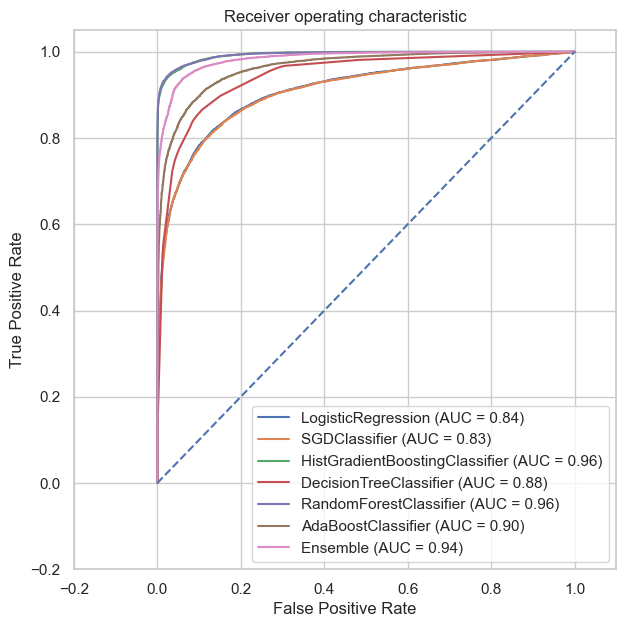

In [26]:
# By selecting several classifiers appropriate to dataset,, models with single and multiple
# estimators are built (with some previous experiments) and their performace is measured with accuracy, 
# recall, AUC and confusion matrix

from sklearn.metrics import accuracy_score, recall_score,confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier


model_LR = LogisticRegression(C=1/0.1, solver='liblinear')
model_SGDC = SGDClassifier(loss = 'log_loss', alpha = 0.001, early_stopping=True, max_iter = 10000)
model_HGBC=HistGradientBoostingClassifier()
model_DTC=DecisionTreeClassifier(max_depth = 5)
model_RFC=RandomForestClassifier()
model_ADA=AdaBoostClassifier()
voting_model = VotingClassifier(
    estimators=[
        ('lr', model_LR), ('sgdc', model_SGDC),('hgbc', model_HGBC), 
        ('dtc', model_DTC), ('rfc', model_RFC), ('ada', model_ADA)], voting='soft')

models = [model_LR,model_SGDC, model_HGBC,model_DTC,model_RFC,model_ADA, voting_model]
clfs = ['LogisticRegression','SGDClassifier','HistGradientBoostingClassifier', 
       'DecisionTreeClassifier','RandomForestClassifier', 'AdaBoostClassifier', "Ensemble"]

accuracy_scores = []
recall_scores = []
matrices = []
roc_auc_scores=[]

plt.figure(figsize=(7, 7))

for model, clf in zip(models,clfs):                     
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_scores.append(accuracy)
    
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)
    
    matrix = confusion_matrix(y_test,y_pred)
    matrices.append(matrix)
    
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    roc_auc_scores.append(roc_auc)

    fpr, tpr,_ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label = f'{clf} (AUC = {roc_auc:.2f})')
    
    
## Summary dataframe is created to display scores for models
    
summary = pd.DataFrame({'models':clfs, 'accuracy': accuracy_scores, 'recall': recall_scores,
                        'AUC': roc_auc_scores, 'Confusion matrix': matrices})
print(summary) 


plt.plot([0, 1], [0, 1],'b--')
plt.xlim([-0.2, 1.10])
plt.ylim([-0.2, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



###  The conclusion: 
#### Analyzing the above dataframe, Random Forest Classifier model, alongside with HistGradientBoostingClassifier model, are the top performing models, having highest scores compared to all other models.  

#### Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers. According to the plot below, the inflight entertainment has the upmost importance as a feature. 

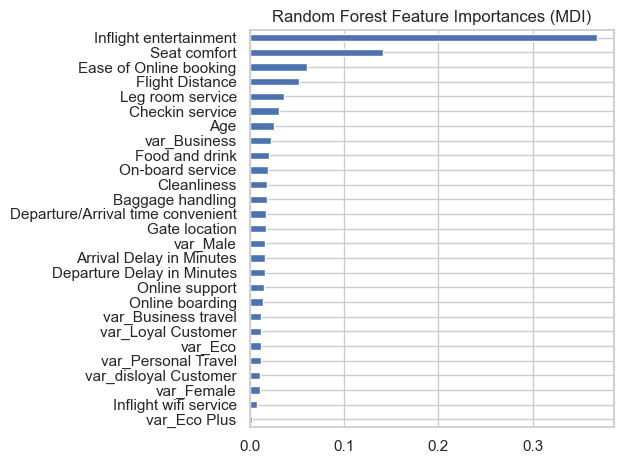

In [27]:
feature_names = data_final.drop(['satisfaction'], axis=1).columns
model_RFC=RandomForestClassifier()
model_RFC.fit(X_train, y_train)
mdi_importances = pd.Series(model_RFC[-1].feature_importances_, index=feature_names).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()